#Prepare The Dataset

In [1]:
%%capture
!pip install ipython-autotime
%load_ext autotime

time: 427 µs (started: 2025-05-26 12:48:21 +00:00)


In [2]:
import pandas as pd
import os
from google.colab import files, drive

time: 448 ms (started: 2025-05-26 12:48:21 +00:00)


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.11 s (started: 2025-05-26 12:48:21 +00:00)


In [4]:
save_path = '/content/drive/MyDrive/DS Final Only Me/enron_labeled_clean.csv'
df = pd.read_csv(save_path)
df.head()

,column_a,message_id,date,from,to,subject,x_from,x_to,x_cc,x_bcc,x_folder,x_origin,x_filename,content,user,labeled,coarse_genre,included_forwarded,primary_topic,emotional_tone
0,379,<9831685.1075855725804.JavaMail.evans@thyme>,2001-03-15T14:45:00,frozenset({'phillip.allen@enron.com'}),frozenset({'todd.burke@enron.com'}),Re: Confidential Employee Information/Lenhart,Phillip K Allen,Todd Burke,NaN,NaN,\Phillip_Allen_June2001\Notes Folders\'sent mail,Allen-P,pallen.nsf,I also need to know the base salaries of Jay R...,allen-p,True,Company Business / Strategy,NaN,Internal Operations,NaN
1,381,<21041312.1075855725847.JavaMail.evans@thyme>,2001-03-15T14:11:00,frozenset({'phillip.allen@enron.com'}),frozenset({'kim.bolton@enron.com'}),RE: PERSONAL AND CONFIDENTIAL COMPENSATION INF...,Phillip K Allen,Kim Bolton,NaN,NaN,\Phillip_Allen_June2001\Notes Folders\'sent mail,Allen-P,pallen.nsf,Thanks for the information. It would be helpfu...,allen-p,True,Personal in Work Context,NaN,NaN,Anxiety
2,2139,<5907100.1075858639941.JavaMail.evans@thyme>,2001-06-20T17:04:51,frozenset({'k..allen@enron.com'}),"frozenset({'matt.smith@enron.com', 'matthew.le...",FW: Western Wholesale Activities - Gas & Power...,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","Lenhart, Matthew </O=ENRON/OU=NA/CN=RECIPIENTS...",NaN,NaN,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Sen...",Allen-P,PALLEN (Non-Privileged).pst,"-----Original Message----- From: Hawkins, Bern...",allen-p,True,Logistics,Forwarded Emails + Replies,NaN,NaN
3,2140,<26625142.1075858639964.JavaMail.evans@thyme>,2001-06-20T17:09:00,frozenset({'k..allen@enron.com'}),"frozenset({'matt.smith@enron.com', 'matthew.le...",FW: Western Wholesale Activities - Gas & Power...,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","Lenhart, Matthew </O=ENRON/OU=NA/CN=RECIPIENTS...",NaN,NaN,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Sen...",Allen-P,PALLEN (Non-Privileged).pst,"-----Original Message----- From: Perrino, Dave...",allen-p,True,Logistics,Forwarded Emails + Replies,NaN,NaN
4,2232,<19730598.1075858642129.JavaMail.evans@thyme>,2001-08-09T12:30:58,frozenset({'k..allen@enron.com'}),"frozenset({'matt.smith@enron.com', 'm..tholt@e...",FW: Western Wholesale Activities - Gas & Power...,"Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENT...","Smith, Matt </O=ENRON/OU=NA/CN=RECIPIENTS/CN=M...",NaN,NaN,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Sen...",Allen-P,PALLEN (Non-Privileged).pst,"-----Original Message----- From: Comnes, Alan ...",allen-p,True,Logistics,Forwarded Emails + Replies,NaN,NaN


time: 428 ms (started: 2025-05-26 12:48:22 +00:00)


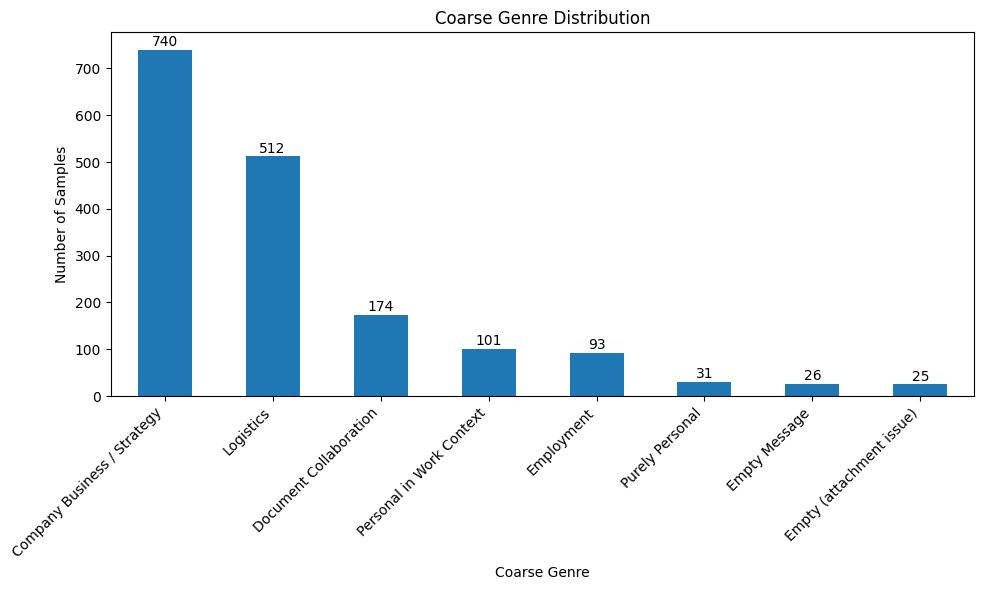

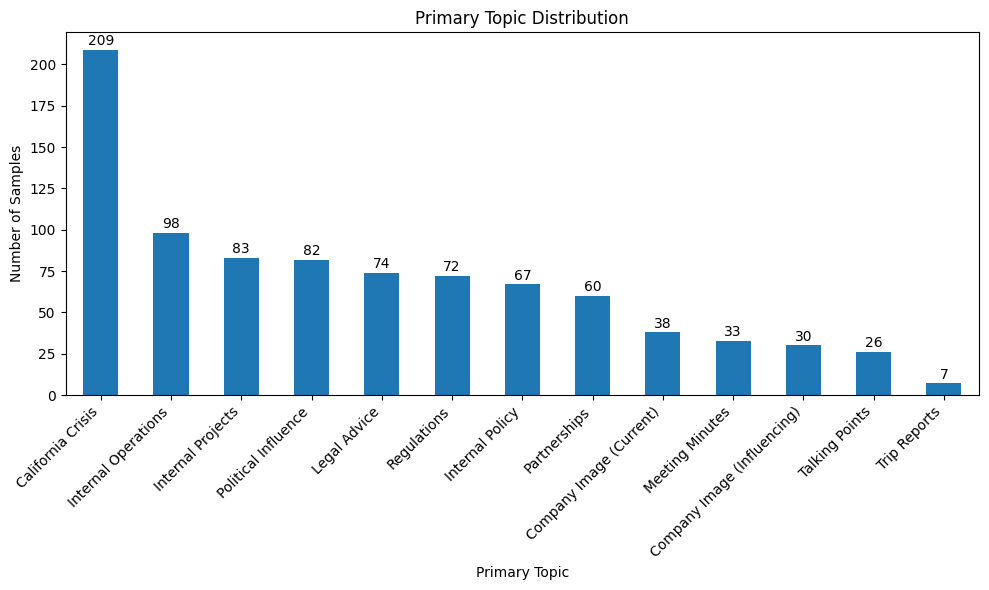

time: 1.04 s (started: 2025-05-26 12:48:23 +00:00)


In [5]:
import matplotlib.pyplot as plt

# Coarse Genre with counts
coarse_counts = df['coarse_genre'].value_counts()

plt.figure(figsize=(10,6))
ax = coarse_counts.plot(kind='bar', title='Coarse Genre Distribution')
plt.ylabel("Number of Samples")
plt.xlabel("Coarse Genre")
plt.xticks(rotation=45, ha='right')

# Add count labels
for i, count in enumerate(coarse_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Primary Topic with counts
primary_counts = df['primary_topic'].value_counts()

plt.figure(figsize=(10,6))
ax = primary_counts.plot(kind='bar', title='Primary Topic Distribution')
plt.ylabel("Number of Samples")
plt.xlabel("Primary Topic")
plt.xticks(rotation=45, ha='right')

# Add count labels
for i, count in enumerate(primary_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [6]:
#Combine "Purely Personal" + "Personal in Work Context" into a single label
df['coarse_genre'] = df['coarse_genre'].replace({
    'Purely Personal': 'Personal',
    'Personal in Work Context': 'Personal'
})

time: 9.48 ms (started: 2025-05-26 12:48:24 +00:00)


In [7]:
#Drop rows where coarse_genre is "Empty (attachment issue)" or "Empty Message"
df = df[~df['coarse_genre'].isin(['Empty (attachment issue)', 'Empty Message'])].copy()

time: 4.54 ms (started: 2025-05-26 12:48:24 +00:00)


In [8]:
# Limit "Company Business / Strategy" and "Logistics" to max 160 rows each
# Separate into groups
df_business = df[df['coarse_genre'] == 'Company Business / Strategy'].sample(n=130, random_state=42)
df_logistics = df[df['coarse_genre'] == 'Logistics'].sample(n=130, random_state=42)
df_document = df[df['coarse_genre'] == 'Document Collaboration'].sample(n=130, random_state=42)

# Keep the rest as-is (all other categories)
df_other = df[~df['coarse_genre'].isin(['Company Business / Strategy', 'Logistics', 'Document Collaboration'])]

# Combine into df_balanced
df_balanced = pd.concat([df_business, df_logistics, df_document, df_other], ignore_index=True)

time: 14.7 ms (started: 2025-05-26 12:48:24 +00:00)


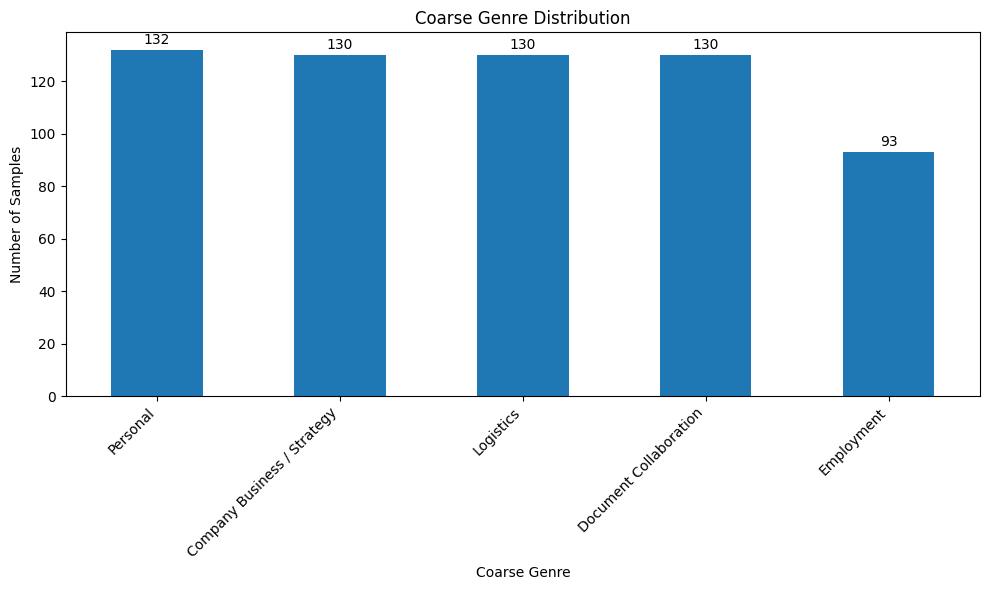

time: 423 ms (started: 2025-05-26 12:48:24 +00:00)


In [9]:
import matplotlib.pyplot as plt

# Coarse Genre with counts
coarse_counts = df_balanced['coarse_genre'].value_counts()

plt.figure(figsize=(10,6))
ax = coarse_counts.plot(kind='bar', title='Coarse Genre Distribution')
plt.ylabel("Number of Samples")
plt.xlabel("Coarse Genre")
plt.xticks(rotation=45, ha='right')

# Add count labels
for i, count in enumerate(coarse_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


#Download

In [10]:
df = df_balanced

time: 379 µs (started: 2025-05-26 12:48:24 +00:00)


In [11]:
#change for reoberta
from transformers import RobertaTokenizer, RobertaForSequenceClassification, RobertaConfig
import torch
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

time: 16.9 s (started: 2025-05-26 12:48:24 +00:00)


#Encoding

In [12]:
# 1. Combine subject and content into one text field
df['text'] = df_balanced['subject'].astype(str) + ' ' + df_balanced['content'].astype(str)

time: 15.3 ms (started: 2025-05-26 12:48:41 +00:00)


In [13]:
# 2. Encode the target (coarse_genre)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['coarse_genre'])

# 3. Save the mapping (to use later for decoding predictions)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'Company Business / Strategy': np.int64(0), 'Document Collaboration': np.int64(1), 'Employment': np.int64(2), 'Logistics': np.int64(3), 'Personal': np.int64(4)}
time: 6.92 ms (started: 2025-05-26 12:48:41 +00:00)


#Split

In [14]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

time: 17.9 ms (started: 2025-05-26 12:48:41 +00:00)


#Tokenize

In [15]:
from transformers import BertTokenizer

#change for roberta
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


time: 12.8 s (started: 2025-05-26 12:48:41 +00:00)


#Dataset Class

In [16]:
import torch
from torch.utils.data import Dataset

class EmailDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings  # tokenizer outputs
        self.labels = labels        # your numeric labels from LabelEncoder

    def __len__(self):
        return len(self.labels)  # how many samples in total

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

time: 951 µs (started: 2025-05-26 12:48:54 +00:00)


In [17]:
train_dataset = EmailDataset(train_encodings, train_labels)
val_dataset = EmailDataset(val_encodings, val_labels)

time: 387 µs (started: 2025-05-26 12:48:54 +00:00)


#Bert

In [18]:
!pip install -U transformers

time: 6.65 s (started: 2025-05-26 12:48:54 +00:00)


In [19]:
from transformers import BertConfig, BertForSequenceClassification

num_labels = len(label_encoder.classes_)  # should match your 7 selected tags

config = RobertaConfig.from_pretrained(
    'roberta-base',
    num_labels=num_labels,
    hidden_dropout_prob=0.4,
    attention_probs_dropout_prob=0.4
)

model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    config=config
)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


time: 3.68 s (started: 2025-05-26 12:49:01 +00:00)


In [20]:
from transformers import BertForSequenceClassification
import torch
from torch.optim import AdamW

# Define number of labels from your label encoder
num_labels = len(label_encoder.classes_)

config = RobertaConfig.from_pretrained(
    'roberta-base',
    num_labels=num_labels,
    hidden_dropout_prob=0.4,
    attention_probs_dropout_prob=0.4
)

model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    config=config
)

# Move model to device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


time: 730 ms (started: 2025-05-26 12:49:05 +00:00)


In [21]:
from torch.utils.data import DataLoader

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

time: 935 µs (started: 2025-05-26 12:49:05 +00:00)


In [22]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Compute weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

# Define weighted loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor, label_smoothing=0.1)


time: 5.12 ms (started: 2025-05-26 12:49:05 +00:00)


In [23]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(8):  # Adjust number of epochs if needed
    print(f"\n🔁 Epoch {epoch + 1}")

    # === TRAINING ===
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)  # ✅ using class-weighted loss
        train_loss += loss.item()

        preds = outputs.logits.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loss.backward()
        optimizer.step()

    train_acc = correct / total
    avg_train_loss = train_loss / len(train_loader)

    # === VALIDATION ===
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs.logits, labels)
            val_loss += loss.item()

            preds = outputs.logits.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    avg_val_loss = val_loss / len(val_loader)

    print(f"✅ Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"🧪 Val   Loss: {avg_val_loss:.4f} | Val   Acc: {val_acc:.4f}")



🔁 Epoch 1


100%|██████████| 31/31 [00:42<00:00,  1.36s/it]


✅ Train Loss: 1.6244 | Train Acc: 0.2154
🧪 Val   Loss: 1.6130 | Val   Acc: 0.1951

🔁 Epoch 2


100%|██████████| 31/31 [00:41<00:00,  1.34s/it]


✅ Train Loss: 1.6200 | Train Acc: 0.2236
🧪 Val   Loss: 1.6123 | Val   Acc: 0.1870

🔁 Epoch 3


100%|██████████| 31/31 [00:42<00:00,  1.37s/it]


✅ Train Loss: 1.6133 | Train Acc: 0.1972
🧪 Val   Loss: 1.6115 | Val   Acc: 0.2033

🔁 Epoch 4


100%|██████████| 31/31 [00:43<00:00,  1.39s/it]


✅ Train Loss: 1.6095 | Train Acc: 0.2541
🧪 Val   Loss: 1.6105 | Val   Acc: 0.2033

🔁 Epoch 5


100%|██████████| 31/31 [00:43<00:00,  1.41s/it]


✅ Train Loss: 1.6095 | Train Acc: 0.2541
🧪 Val   Loss: 1.6103 | Val   Acc: 0.2033

🔁 Epoch 6


100%|██████████| 31/31 [00:43<00:00,  1.42s/it]


✅ Train Loss: 1.5909 | Train Acc: 0.2622
🧪 Val   Loss: 1.6071 | Val   Acc: 0.1870

🔁 Epoch 7


100%|██████████| 31/31 [00:44<00:00,  1.42s/it]


✅ Train Loss: 1.5931 | Train Acc: 0.2602
🧪 Val   Loss: 1.6072 | Val   Acc: 0.1951

🔁 Epoch 8


100%|██████████| 31/31 [00:44<00:00,  1.42s/it]


✅ Train Loss: 1.6037 | Train Acc: 0.2561
🧪 Val   Loss: 1.6080 | Val   Acc: 0.2276
time: 6min 17s (started: 2025-05-26 12:49:05 +00:00)


#Metrics

In [24]:
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = outputs.logits.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


time: 3.4 s (started: 2025-05-26 12:55:23 +00:00)


In [25]:
from sklearn.metrics import classification_report

# Get label IDs sorted as they appear in label_encoder
label_ids = list(range(len(label_encoder.classes_)))
target_names = label_encoder.inverse_transform(label_ids)

# Print report
print(classification_report(all_labels, all_preds, target_names=target_names))


                             precision    recall  f1-score   support

Company Business / Strategy       0.00      0.00      0.00        26
     Document Collaboration       0.24      0.35      0.28        26
                 Employment       0.20      0.58      0.30        19
                  Logistics       0.26      0.31      0.28        26
                   Personal       0.00      0.00      0.00        26

                   accuracy                           0.23       123
                  macro avg       0.14      0.25      0.17       123
               weighted avg       0.14      0.23      0.17       123

time: 11.7 ms (started: 2025-05-26 12:55:26 +00:00)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


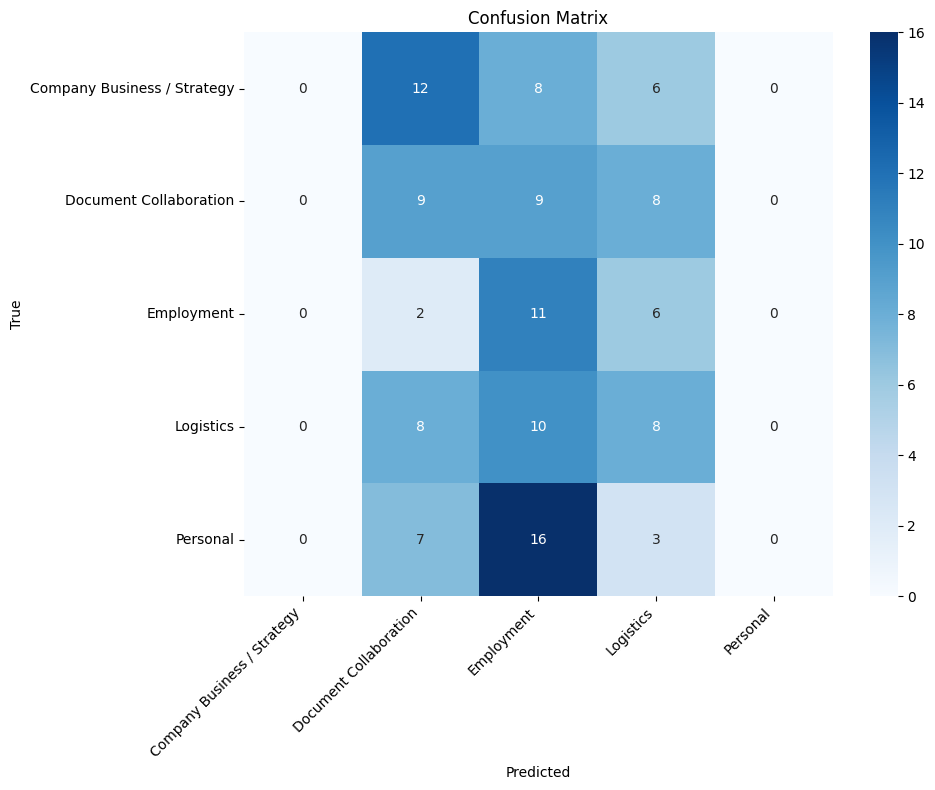

time: 538 ms (started: 2025-05-26 12:55:26 +00:00)


In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [27]:
df['coarse_genre'].value_counts()

,count
coarse_genre,
Personal,132
Company Business / Strategy,130
Logistics,130
Document Collaboration,130
Employment,93


time: 6.81 ms (started: 2025-05-26 12:55:27 +00:00)


In [28]:
df.to_csv('review_labeled_enron.csv', index=False)
from google.colab import files
files.download('review_labeled_enron.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 171 ms (started: 2025-05-26 12:55:27 +00:00)
